In [1]:
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce
from linear_algebra import *

In [4]:

def is_leaf(cluster):
    return len(cluster) == 1

def get_children(cluster):
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

def get_values(cluster):
    if is_leaf(cluster):
        return cluster 
    else:
        return [value
                for child in get_children(cluster)
                for value in get_values(child)]

def cluster_distance(cluster1, cluster2, distance_agg=min):
    return distance_agg([distance(input1, input2)
                        for input1 in get_values(cluster1)
                        for input2 in get_values(cluster2)])

def get_merge_order(cluster):
    if is_leaf(cluster):
        return float('inf')
    else:
        return cluster[0] 

def bottom_up_cluster(inputs, distance_agg=min, verbose=0):
    clusters = [(input,) for input in inputs]
    while len(clusters) > 1:
        c1, c2 = min([(cluster1, cluster2)
                     for i, cluster1 in enumerate(clusters)
                     for cluster2 in clusters[:i]],
                     key=lambda tup: cluster_distance(tup[0], tup[1], distance_agg))

        clusters = [c for c in clusters if c != c1 and c != c2]
        merged_cluster = (len(clusters), [c1, c2])
        clusters.append(merged_cluster)
    return clusters[0]

def generate_clusters(base_cluster, num_clusters):
    clusters = [base_cluster]
    while len(clusters) < num_clusters:
        next_cluster = min(clusters, key=get_merge_order)
        clusters = [c for c in clusters if c != next_cluster]
        clusters.extend(get_children(next_cluster))
    return clusters

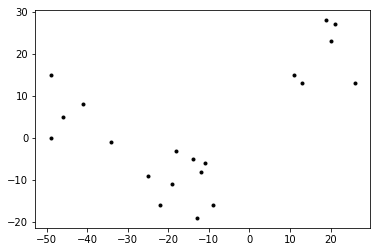

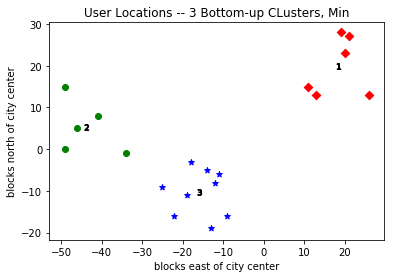

In [5]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
xs,ys= list(zip(*inputs))
plt.scatter(xs,ys,marker='.', color='black')
plt.show()

base_cluster = bottom_up_cluster(inputs, max)
three_clusters = [get_values(cluster) for cluster in generate_clusters(base_cluster, 3)]

for i, cluster, marker, color in zip([1,2,3],three_clusters,['D','o','*'],['r','g','b']):
    xs, ys = zip(*cluster)
    plt.scatter(xs,ys,color=color,marker=marker)
    x,y=vector_mean(cluster)
    plt.plot(x,y,marker='$'+str(i)+'$',color='black')
plt.title('User Locations -- 3 Bottom-up CLusters, Min')
plt.xlabel('blocks east of city center')
plt.ylabel('blocks north of city center')
plt.show()
    

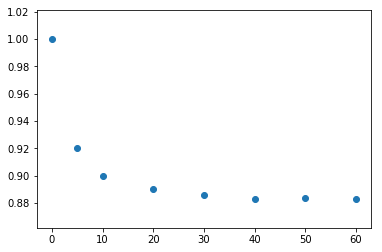

In [19]:
x=[0,5,10,20,30,40,50,60,100]
y=[1,0.92,0.9,0.89,0.886,0.883,0.8835,0.8832]

plt.scatter(x,y)
plt.show()


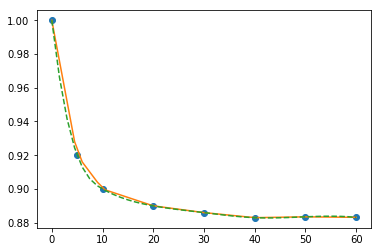

In [20]:
import numpy as np
from scipy.interpolate import interp1d
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 60, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.show()